In [1]:
'''Import standard packages'''
import numpy as np
import matplotlib.pyplot as plt


## PHYS 481 Final Exam

December 9, 2018

Kenneth Sharman (00300185)

### Introduction

The solitary wave, appropriately named as it typically occurs as a single localized entity, was first observed by J. Scott Russel on the Edinburgh-Glasgow canal in 1834; he called it the 'great wave of translation'. He observed the wave produced by a boat in the canal. Unexpectedly, after the boat stopped the wave continued to roll along, specifically describing it as 'a well-defined heap of water, which continued it course along the channel apparently without change of form or diminution of speed' [1].

It is now known that the soliton wave is a result of the balance between the dispersion and nonlinear effects. These can be thought of as the wave's tendency to spread out and to break (like waves breaking on a shoreline). The wave is a solution to the Korteweg-de Vries (KdV) equation.

$$ \frac{\partial u}{\partial t} + \frac{\partial^3 u}{\partial x^3} + 6 u \frac{\partial u}{\partial x} = 0 $$

By directly integrating this equation we get the equation which describes the characteristic shape of the soliton wave

$$ u(x,t) = \frac{c}{2} sech^2 \Bigg[ \frac{\sqrt{c}}{2}(x-ct-a) \Bigg] $$

Where $c$ is the speed of the wave and $a$ is an arbitrary constant. This equation tells us that the wave will be tall and narrow if it is propagating quickly, or short and wide if it is moving slow.

We are interested in the KdV equation because it is an exactly solvable model, so we can perform an in depth analysis of the error associated with numerical solutions using difference equations. We had previously studied the classic wave equation, with solutions to the following differential equation. 

$$ \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} $$

It was found that the Courant number contained the information necessary to determine the stability of the solution, which made the analysis rather straightforward. Determining parameters for finite difference solutions which remain stable for a given period of time is not always so straightforward and will be the focus of this report.

#### Discretizing the KdV eqquation

As a simple finite difference scheme for the KdV equation we will use a forward difference time derivative and a centered difference for the spatial derivative. The initial analysis will be done using 1st order accuracy in time and 2nd degree accuracy in space. These derivatives are:

$$ \frac{\partial u}{\partial t} \approx \frac{- u(t_0) + u(t_{+1})}{h_t} $$

$$  \frac{\partial u}{\partial x} \approx \frac{-0.5 {u(x_{-1})} + 0.5 {(x_{+1})} }{h_x}  \qquad \frac{\partial^3 u}{\partial x^3} \approx \frac{-0.5 u(x_{-2}) + u(x_{-1}) - u(x_{+1}) + 0.5 u(x_{+2})}{{h_x}^3} $$

Where $h_x$ is the uniform grid spacing between each finite difference interval [2]. We will use the notation $h_x = \Delta x$ and $h_t = \Delta t$ to represent the spacing between values in an array. Thus, we can express the DE as the following difference equation

$$ \frac{- {u_j^n} + {u_j^{n+1}}}{\Delta t} = -6 {u_j^n} \frac{- 0.5{u_{j-1}^n} + 0.5{u_{j+1}^n}}{\Delta x} - \frac{-0.5 {u_{j-2}^n} + {u_{j-1}^n} - {u_{j+1}^n} + 0.5 {u_{j+2}^n}}{(\Delta x)^3}  $$

Rearranging for $u_j^{n+1}$

$$ \Longrightarrow {u_j^{n+1}} = {u_j^{n}} - 6 {u_j^n} \Big[ -0.5 {u_{j-1}^n} + 0.5 {u_{j+1}^n} \Big] \frac{\Delta t}{\Delta x} - \Big[ -0.5{u_{j-2}^n} + {u_{j-1}^n} - {u_{j+1}^n} + 0.5 {u_{j+2}^n} \Big] \frac{\Delta t}{(\Delta x)^3} \qquad [1] $$

#### Conserved Quantities

It can be shown that the soliton has an infinite number of conservation laws. These are represented by integrals that are equal to a constant value. The first three are well established conserved quantities:

- Conservation of Mass: $ \qquad \qquad \int u \; dx $
- Conservation of Momentum: $ \qquad \int u^2 \; dx $
- Conservation of Energy: $ \quad \qquad \int 2u^3 - \partial_x u^2 \; dx \qquad [2] $

These integrals are continuous, however we will be working with finite difference equations. The equivalent operation is the sum of the array which represents the wave in the spatial domain. We will test this approximation by comparing it to the value of the integral at the initial time. If the values are within a desired tolerance, then we can say that the model is acceptable at the initial time. 

As a preliminary check, we will investigate the initial energy by comparing the analytic and numeric values. The parameters specified in the assignment are 

$L = 50.0$, $T=19.0$, $\Delta x = 0.75 $, $\Delta t = 0.020$, $c=1.0$

Note, that to compare the finite difference sum with the integral we must use a spacing of $\Delta x = 1$ so that the sum represents the area under the curve.

Setting the constant $a$ to the mean value of this spatial domain with $\Delta x = 1$ gives the value $a=24.5$.

In [2]:
'''implement code required to calculate exact initial energy'''
from scipy.integrate import quad
from scipy.misc import derivative

def analytic_soliton(x, t, c, a):
    '''
    Function calculates and returns the analytic solution to soliton wave
    Parameters
        x: spatial coordinate (m)
        t: temporal coordinate (s)
        c: speed of soliton (m/s)
        a: spatial phase shift (m)
    '''
    arg = 0.5*np.sqrt(c) * (x - c*t - a)
    sech = 1.0 / np.cosh(arg)
    return 0.5 * c * sech**2

def soliton_energy(x, t, c, a):
    '''
    Function calculates and returns the energy of the wave given by the
    integrand in equation [2]
    Parameters
        x: spatial coordinate (m)
        t: temporal coordinate (s)
        c: speed of soliton (m/s)
        a: spatial phase shift (m)
    '''
    u = analytic_soliton(x, t, c, a)
    dudx = derivative(analytic_soliton, x, args=(t, c, a))
    return 2*u**3 - dudx**2


In [3]:
'''Calculate exact and finite difference initial energy'''
x = np.arange(0, 50, 1) # spatial domain
t, c, a = 0, 1.0, 24.5 # soliton parameters
u = analytic_soliton(x, t, c, a) # analytic soliton waveform

energy_fd = np.sum(2*u*u*u - \
            ((-0.5*np.roll(u, 1) + 0.5*np.roll(u, -1))/(1))**2)
energy_exact, error = quad(soliton_energy, 0.0, 50.0, args=(t, c, a)) # integral


In [4]:
'''Display calculated values'''
print('Initial Energy: %20.8f' % energy_exact, 'J +/- %.0e' % error, 'J')
print('Finite Difference Energy: %.8f' % energy_fd, 'J')


Initial Energy:           0.42665685 J +/- 8e-12 J
Finite Difference Energy: 0.42661028 J


We can see that the initial energy, as calculated by our finite difference scheme, is accurate for four decimal places. Assume that this is within the desired tolerance for the problem at hand.

At this point, we will focus on the conservation of energy as the wave propagates through time and assess if it is an acceptable approximation to the soliton wave. From our previous work done with the wave equation, it is expected that the spatial and temporal spacing (as well as the speed) will have an effect on the solution's accuracy moving forward in time.

#### The Code

We will first implement the code necessary to perform the analysis, using finite differences of second order accuracy. We will use wrap around boundary conditions and set the phase such that the wave is originally in the center of the spatial domain. As part of the analysis, we must remember to investigate if the wrap around boundary conditions influence the solution.

In [5]:
'''Implement class to organize soliton wave attributes'''
class Soliton:
    '''
    Class represents a one-dimensional soliton
    '''
    def __init__(self, L, T, dx, dt, c, a=None):
        '''
        Constructor initializes soliton attributes which define its shape
        Parameters
            L, T: Spatial and temporal domains of wave
            dx, dt: Spacing in spatial and temporal domains
            c: speed of wave
            a: spatial phase offset
        '''
        self.dx, self.dt, self.c = dx, dt, c
        self.x = np.arange(0.0, L, self.dx) # array represents wave in space
        self.t = np.arange(0.0, T, self.dt) # array represents wave in time
        if a is None: # if not specified, shift wave to center of space domain
            self.a = np.median(self.x)
        else: # otherwise set as described
            self.a = a
        self.u0 = self.kdv_exact() # wave at t0 defined by analytic solution to KdV

    def kdv_exact(self, t=0.0):
        '''
        Function calculates and returns the analytic solution to KdV equation.
        Default time parameter is zero.
        '''
        # define argument of hyperbolic secant (cosine) for readability
        arg = 0.5*np.sqrt(self.c) * (self.x - self.c*t - self.a)
        sech = 1.0 / np.cosh(arg)
        return 0.5 * self.c * sech**2

    def kdv_stepper(self, save=False, save_stride=99, EET=False, error=0.1):
        '''
        Function propagates wave through time, using finite difference scheme with
        first order time derivative and second order spatial derivative.
        Parameters:
            save: If true, the occasional wave is added to stack, which is returned
            for plotting purposes (occasional defined by save_stride parameter)
            save_stride: if loop index is evenly divisible by stride then add current
            wave to the stack
            EET: If true, sets self.time to time when absolute relative error of wave
            is greater than or equal to error parameter.
            error: tolerance for absolute relative error
        '''
        self.u = self.u0 # Set wave to analytic solution at t=0
        # Spacing ratios/ factors defined for readability and simplified code
        dtdx = self.dt/self.dx # trailing factor in second term of equation [1]
        dtdx3 = self.dt/(self.dx)**3 # trailing factor in third term of equation [2]

        energy = np.zeros(len(self.t)) # array to store energy of wave at each time
        # calc initial energy using equation [2]. E.g. np.roll(u,1) gets left nearest
        # neighbor in the spatial domain
        energy[0] = np.sum(2*self.u**3 - \
            ((-0.5*np.roll(self.u, 1) + 0.5*np.roll(self.u, -1))/(self.dx))**2)
        stack = [self.u] # add initial waveform to stack
        self.time = 'No EET set' # variable stores time at which absolute relative error
        # of energy is >= error. Initial string value indicates that no EET was found

        for indx, tval in enumerate(self.t[1:]): # calc u and energy for t > t0

            # 1st and 3rd finite difference derivatives
            du_dx1c = +0.5*np.roll(self.u, -1) -0.5*np.roll(self.u, 1)
            du_dx3c = -0.5*np.roll(self.u, 2) +1.0*np.roll(self.u, 1) \
            - 1.0*np.roll(self.u, -1) +0.5*np.roll(self.u, -2)

            # update u according to equation [1]
            self.u = self.u - 6*self.u*du_dx1c*dtdx - du_dx3c*dtdx3
            # indexing starts at zero, however first updated wave is at t1
            energy[indx+1] = np.sum(2*self.u**3 - (du_dx1c/self.dx)**2)

            # if saving to stack, and mod is zero, add waveform to stack
            if save == True and (indx%save_stride == 0): stack.append(self.u)
            # if finding EET and abs erro >= error, set time and break from loop
            if EET == True and (abs(energy[indx+1]-energy[0])/energy[0]) >= error:
                self.time = tval; break

        return self.u, stack, energy


There will be multiple plots of the same form in this report, which show the wave propagation in time as well as the absolute relative change in energy, so it would be wise to define a function that performs this action.

In [6]:
'''Define function for plotting as it will be repeatedly used'''
def plot_wave_energy(wave, title, stride, linear=False, log=False):
    '''
    Function plots both the propagation of wave and the absolute relative
    error in energy through time.
    Parameters
        wave: one-dimensional soliton wave object
        stride: occasional plot of waveform
        linear: If True, linear curve is added to EET plot for comparison
        log: If True, log10 curve is added to EET plot for comparison
    '''
    u, stack, energy = wave.kdv_stepper(save=True, save_stride=stride) # Step through time

    plt.subplots(1, 2, figsize=(15, 5)) # 2 subplots
    plt.suptitle(title, fontsize='xx-large') # Title for both plots

    plt.subplot(1, 2, 1); plt.grid()
    plt.plot(wave.x, wave.u0, lw=3) # subplot 1 is waveform propagation
    for indx in range(0, len(stack)-1, 2): # for every 2nd wave in stack:
        # if amplitude is > 1.5*initial amplitude, break since wave is diverging
        if np.max(stack[indx]) > np.max(wave.u0)*1.5: break
        # plot wave and label it by its time
        plt.plot(wave.x, stack[indx], lw=3, label=str(wave.t[indx*stride]))
    plt.xlabel('x (m)', fontsize='x-large')
    plt.xlim((wave.a-25), (wave.a+25)) # center x-limits to wave travelling for small time
    plt.ylabel('Amplitude $u(x,t)$', fontsize='x-large'); plt.ylim(0, 0.75)
    plt.legend(loc=0, title='Time (s)')

    plt.subplot(1, 2, 2); plt.grid() # subplot 2 is absolute relative error in energy
    plt.plot(wave.t, 100*(abs(energy-energy[0]))/energy[0], lw=3, label='numerical')
    plt.yscale('symlog'); # scale with semi-log axis, to distinguish growth rates
    plt.xlabel('Time (s)', fontsize='x-large')
    plt.ylabel('Relative Change in Energy  (%)', fontsize='x-large')
    if linear == True: plt.plot(wave.t, wave.t, lw=2, ls='--', label='linear')
    if log == True: # if adding log curve, only use t_vals >= 1
        log_ts = np.arange(1, wave.t[-1], 0.1)
        plt.plot(log_ts, np.log10(log_ts), lw=2, ls='-.', label='Log_10')
    plt.legend(loc=0)

    plt.show()


With the bulk coding out of the way, we can now begin the analysis. First, we will use the parameters provided in the assignment, to instantiate a soliton and plot its behavior.

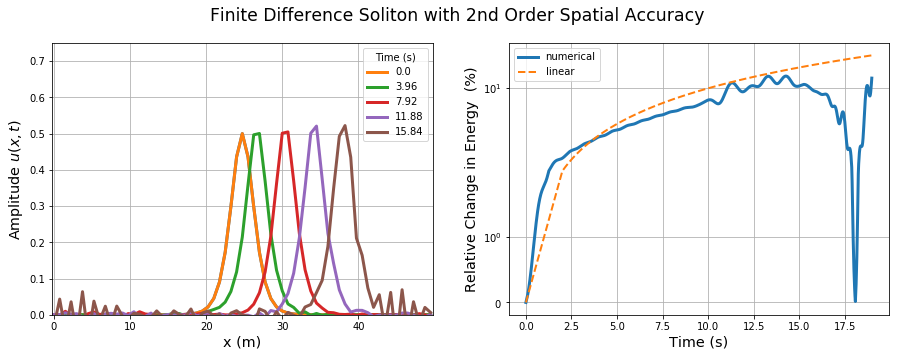

In [7]:
'''Plot Soliton Wave and Energy Error using Assignment Specified Parameters'''
wave_2order = Soliton(L=50.0, T=19.0, dx=0.75, dt=0.020, c=1.0)
title = 'Finite Difference Soliton with 2nd Order Spatial Accuracy'
plot_wave_energy(wave_2order, title, 99, linear=True)


The left plot shows an initial waveform that is reasonably well-formed and consistent with our expectations, however after a short period of time, the wave appears to have an imbalance in the dispersive and nonlinear effects. The resulting waveform after roughly 15 seconds is no longer well-formed and exhibits some noise in areas of the spatial domain where it should have no amplitude. The plot representing the change in energy supports this assertion, as it becomes quite chaotic around 15 seconds. 

It can also be noted that for the first two seconds, the relative change in error increases at a faster than linear rate, then it is approximately linear up to the "breaking point" at 15 seconds. 

My interpretation of the parameters introduced by the assignment is such that I will attempt to minimize the change in error using these parameters. If satisfactory results cannot be obtained from these numbers, I will investigate which parameters should be changed with the ultimate goal being to model this configuration with minimal change in error and minimal computational cost.

Clearly, if the goal is to accurately model the soliton for 19 seconds, the parameters used above need some tweaking. In the final in PHYS 381 we investigated the topic of curve fitting. The task was similar, as appropriate parameters were required for the best fit. A topic introduced was the use of contour plots, which can be used to select ideal values for the problem at hand. Unfortunately, I missed this part of the assignment and performed no contour plot analysis. We will however be using contour plots here to determine the ideal spacing in temporal and spatial domains. As previously mentioned, we saw in the last assignment that the domain spacing plays an important role in the use of finite difference equations. So, we expect that change these values will lead to solitons with different behaviors. We will attempt to identify the ideal spacings in order to minimize the change in error.

Just like the plots used above, we will have numerous contour plots, so a function is defined to do this job.

In [8]:
'''Define function to plot EET as it will be repeatedly used'''
def plot_EET(dx_wide, dt_wide, dx_zoom, dt_zoom, title, title_wide, title_zoom, order, err_lim=0.1):
    '''
    Function creates 2 plots for EET of soliton specified by params in assignment.
    Parameters:
        dx_wide, dt_wide: wide angle x and t spacings
        dx_zoom, dt_zoom: magnified view of optimal x and t spacings
        titles: Super title and both wide and magnified plot titles
        order: Accuracy of spatial derivative specifies which class to instantiate
        err_lim: EET error limit
    '''

    def calc_Z(Z, dx_vals, dt_vals):
        '''Helper function iterates matrix and sets Z value at each point'''
        for i, row in enumerate(Z):
            for j in range(len(row)): # for every point in matrix:
                if order == 2: # order 2 indicates use of Soliton class
                    wave = Soliton(L=50.0, T=19.0, dx=dx_vals[j],\
                                   dt=dt_vals[i], c=1.0, a=None)
                else: # order 4 indicates use of Soliton_4Order class
                    wave = Soliton_4Order(L=50.0, T=19.0, dx=dx_vals[j],\
                                          dt=dt_vals[i], c=1.0, a=None)
                # run stepper to get EET
                wave.kdv_stepper(save_stride=99, EET=True, error=err_lim)
                Z[i][j] = wave.time # set Z value of matrix entry to EET
        return Z

    plt.subplots(1, 2, figsize=(15, 5)) # 2 subplots
    plt.suptitle(title, fontsize='xx-large')

    plt.subplot(1, 2, 1); plt.grid()
    X, T = np.meshgrid(dx_wide, dt_wide) # matrix for contour plot
    Z = np.zeros((len(dt_wide), len(dx_wide))) # initialize Z values to zero
    Z = calc_Z(Z, dx_wide, dt_wide)
    # contour plot of EET values
    plt.contourf(X, T, Z); plt.title(title_wide, fontsize='x-large')
    plt.xlabel('$\Delta x$ (m)', fontsize='x-large');
    plt.ylabel('$\Delta t$ (s)', fontsize='x-large')
    # add colorbar to understand contourf color values
    cbar = plt.colorbar(); cbar.set_label('EET (s)', rotation=270, labelpad=20)

    # Second subplot code does same as first with magnified spacing region
    plt.subplot(1, 2, 2); plt.grid()
    X, T = np.meshgrid(dx_zoom, dt_zoom)
    Z = np.zeros((len(dt_zoom), len(dx_zoom)))
    Z = calc_Z(Z, dx_zoom, dt_zoom)
    plt.contourf(X, T, Z); plt.title(title_zoom, fontsize='x-large')
    plt.xlabel('$\Delta x$ (m)', fontsize='x-large')
    plt.ylabel('$\Delta t$ (s)', fontsize='x-large')
    cbar = plt.colorbar(); cbar.set_label('EET (s)', rotation=270, labelpad=20)

    # Add padding between super and subplot titles
    plt.subplots_adjust(top=0.85); plt.show()


The function will display two contour plots. This is for presentation purposes only. The real procedure is that a wide range of values is plotted, then the bounds are changed to zoom into a region that provides the longest duration of energy stability. This process may have to be repeated several times to zoom into the ideal range. There is some trial and error involved in determining the optimal range of spacings, so the second subplot is a result of trial and error. 

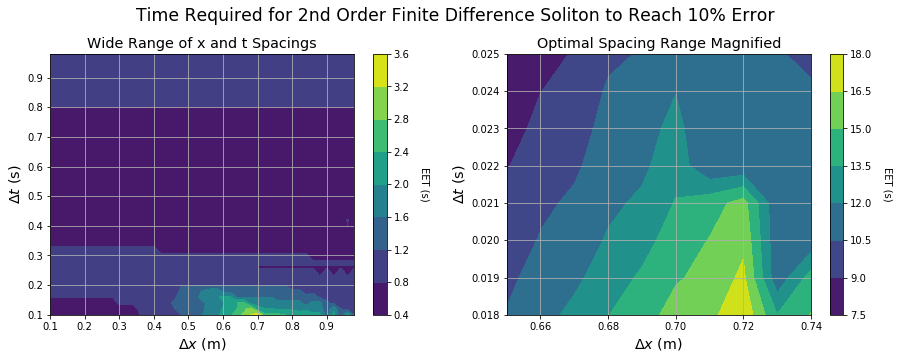

In [9]:
'''Plot EET Contour for 2nd Order Spatial Accuracy Soliton'''
# wide-angle region is an uninformed guess- just to get an idea of EET values
wide_dxs = np.arange(0.1, 1.0, 0.02)
wide_dts = np.arange(0.1, 1.0, 0.02)

# zoomed view is result of first plot and a bit of trial and error
zoom_dxs = np.arange(0.65, 0.75, 0.01)
zoom_dts = np.arange(0.018, 0.025, 0.001)

title = 'Time Required for 2nd Order Finite Difference Soliton to Reach 10% Error'
title_wide = 'Wide Range of x and t Spacings'
title_zoom = 'Optimal Spacing Range Magnified'
plot_EET(wide_dxs, wide_dts, zoom_dxs, zoom_dts, title, title_wide, title_zoom, order=2)


The first to note here is that the "best" spacings still only result in the relative change in error being bounded by $10%$ for 18 seconds. Remember that we are tasked with determining the ideal parameters for a model which runs for 19 seconds. This appears to not get the job done, however we found some information about the behavior of the system that is not present in the plots. During the process of trial and error, to produce the second subplot, it was found that smaller spacings in the time domain lead to larger periods of stability. Thus, we should simply analyze contour plots for smaller time spacings. Unfortunately, there are two drawbacks to the contour plot method we are using.

The first, is that for better and better parameters, the soliton will propagate through the 19 seconds and not breach the $10\%$ change in energy barrier. There is no EET set for solitons that conserve their energy relatively well. A simple solution to this problem, would be to allow the system to evolve for more than 19 seconds. This however, is complicated by the second drawback of our analysis so far.

Through the process of trial and error, it appears that there is a sweet spot for the spacing of points in the spatial domain, somewhere around $0.72$ m. Above or below this value leads to solitons that are increasingly ineffective at conserving their energy. This is not the same with the time spacings. It appears that decreasing the time spacing will lead to solitons with better behavior. If we simply allow the system to run for a longer period of time with small time spacings, the result should be solitons that conserve their energy extremely well, however the computational cost to create a contour plot of this is impractical.

As a preliminary workaround to the problem, we will simply determine the ideal spacing in the x domain using a contour plot with time spacings that compiles in a reasonable amount of time. Then, we will use the smallest time spacings such that the soliton wave can be instantiated and propagate through the 19 seconds, in a reasonable amount of time. Clearly, this method is dependent on what a reasonable amount of time is. For the purposes of this report, a few seconds should be adequate to get decent results. The following is the result of some trial and error to find the ideal parameters, while keeping the computational runtime to a minimum.

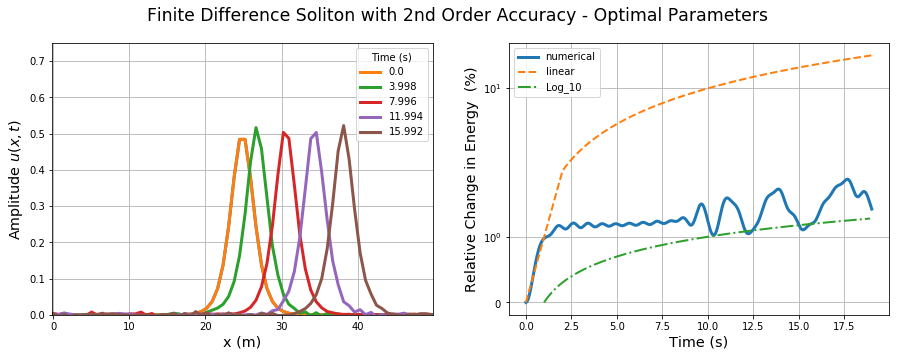

In [10]:
'''Plot Soliton Wave and Relative Error in Energy using Optimal Parameters'''
wave1_2order = Soliton(L=50.0, T=19.0, dx=0.72, dt=0.001, c=1.0)
title = 'Finite Difference Soliton with 2nd Order Accuracy - Optimal Parameters'
plot_wave_energy(wave1_2order, title, 1999, linear=True, log=True)


Comparing these plots to the previous soliton, we see that significant improvement was made in both energy conservation and the ability of the soliton to keep a well-formed shape. The energy plot shows some interesting behavior. The energy error starts off by increasing at a linear rate, then oscillates around a rate that is better than logarithmic. Unfortunately, the apparent stability disappears after 10 seconds.

Recall that the soliton class was implemented using wrap around boundary conditions. Depending on the application of the model, this may or may not be a crucial characteristic of the intended system. If it is not actually part of our model, we should investigate its impact. We see that the energy conservation becomes worse for longer periods of time, however this could actually be due to the fact that the wave is getting closer and closer to the boundary.

We will instantiate a soliton that has the same parameters as previously plotted, however the spatial domain will be enlarged to $200$ m.

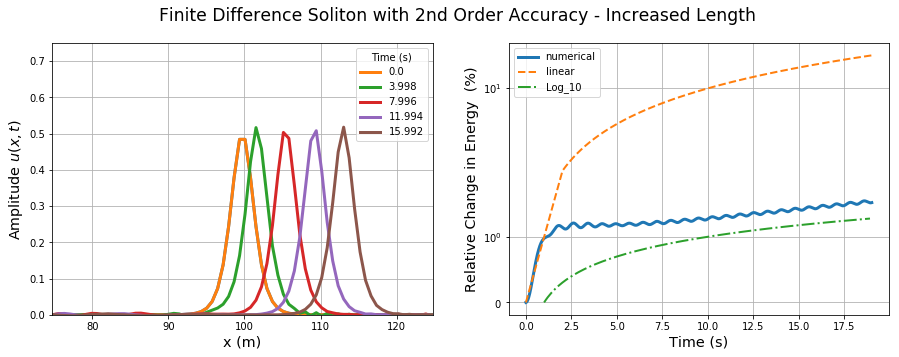

In [11]:
'''Enlarge Space domain and plot using same parameters as above'''
wave1_2order = Soliton(L=200.0, T=19.0, dx=0.72, dt=0.001, c=1.0)
title = 'Finite Difference Soliton with 2nd Order Accuracy - Increased Length'
plot_wave_energy(wave1_2order, title, 1999, linear=True, log=True)


It definitely appears as though the wrap around boundary conditions have a profound impact on the wave as it nears the boundary. By extending the spatial domain we have a soliton that conserves energy in a uniform manner, with the exception of the initial linear change in energy (first few seconds).

To recap our findings so far:

1. There is a sweet spot for the spacing in the x domain, around 0.72 m
2. Decreasing the time spacing increases the accuracy of the model (at least up to resolutions that can be run in a reasonable amount of time - there may be an unobserved sweet spot that is very small).
3. Increasing the length of the spatial domain will minimize the unwanted effects of the wrap-around boundary conditions.

In an perfect world; we set the ideal $\Delta x$, make a huge x domain, and use really small $\Delta t$. It isn't hard to imagine that this could require a huge amount of memory allocation and a massive runtime. Thus, there is a trade-off with accuracy and runtime.

There is no single "best" balance to this trade-off, and would be dependent on the desired accuracy, allowed runtime, and memory available. In terms of runtime, we can investigate the effects of increasing the spatial domain and reducing the time steps. Below are plots for both of these considerations.

In [20]:
'''Import timeit package to evaluate runtimes'''
import timeit

timed_L, timed_dt = [], [] # lists to store runtimes
length_vals = np.arange(50, 1050, 100) # lengths to evaluate runtime
dt_vals = np.arange(0.001, 0.01, 0.002) # dt vals to evaluate runtime

# Instantiate Soliton with varied lengths store runtime in list
for length in length_vals:
    wave = Soliton(L=length, T=19.0, dx=0.71, dt=0.01, c=1.0, a=None)
    timed_L.append(timeit.timeit(wave.kdv_stepper, number=15))

# Instantiate Soliton with varied dt spacings and store runtimes
for deltat in dt_vals:
    wave = Soliton(L=50.0, T=19.0, dx=0.71, dt=deltat, c=1.0, a=None)
    timed_dt.append(timeit.timeit(wave.kdv_stepper, number=5))


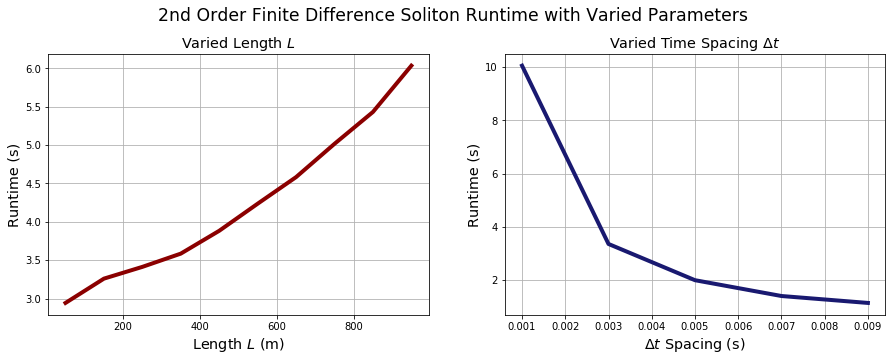

In [21]:
'''Plot runtimes for length and time spacing'''
plt.subplots(1, 2, figsize=(15, 5))
title = '2nd Order Finite Difference Soliton Runtime with Varied Parameters'
plt.suptitle(title, fontsize='xx-large')

plt.subplot(1, 2, 1); plt.grid()
plt.plot(length_vals, timed_L, linewidth=4, c='darkred')
plt.title('Varied Length $L$', fontsize='x-large')
plt.xlabel('Length $L$ (m)', fontsize='x-large')
plt.ylabel('Runtime (s)', fontsize='x-large')

plt.subplot(1, 2, 2); plt.grid()
plt.plot(dt_vals, timed_dt, linewidth=4, c='midnightblue')
plt.title('Varied Time Spacing $\Delta t$', fontsize='x-large')
plt.xlabel('$\Delta t$ Spacing (s)', fontsize='x-large')
plt.ylabel('Runtime (s)', fontsize='x-large')

# Add padding between super and subplot titles
plt.subplots_adjust(top=0.85); plt.show()


When the timing function was used to calculate the average runtimes, it found that only a few iterations would result in a decent runtime. Usually, the above plots show a relatively linear relationship for various lengths of the spatial domain, and an inverse power or inverse exponential relationship when varying the time steps. Note that this may not always be the case, due to low number averaging. More accurate results can be obtained by increasing the number of iterations that the timeit function is allowed to make.

What we can get from these plots is that the first step to improve accuracy would be to increase the length of the spatial domain- IF we have the memory available. When it comes to the time step, a certain accuracy will absolutely require a particular minimum spacing. Thus, if you want more accurate results you will have to wait for it- there appears to be no alternative (at least with the soliton implemented as is).

This is drastically different from what we saw with the wave equation. There, the stability was determined by the Courant number which itself is a function of the x and t spacings (as well as speed). While there is still a delicate balance between how the domains were implemented, it was a relatively straightforward process to determine the ideal parameters, and the runtime was not as big of a factor. Here, we have not mathematically defined the stability condition (although it can be done using complex analysis) so determining the ideal parameters is much more involved. To make things harder, long runtimes are required to investigate various time steps, and it becomes impractical to look at a wide range.

For a complete analysis of the parameters, we should have a look at how the speed effects that stability of the waveform and energy conservation. It has been omitted so far in the analysis because it was assumed that the speed was a trait of the system that we were attempting to model. None-the-less we expect (as in the case of the wave equation), that decreasing the speed will lead to a more stable and accurate finite difference solution.

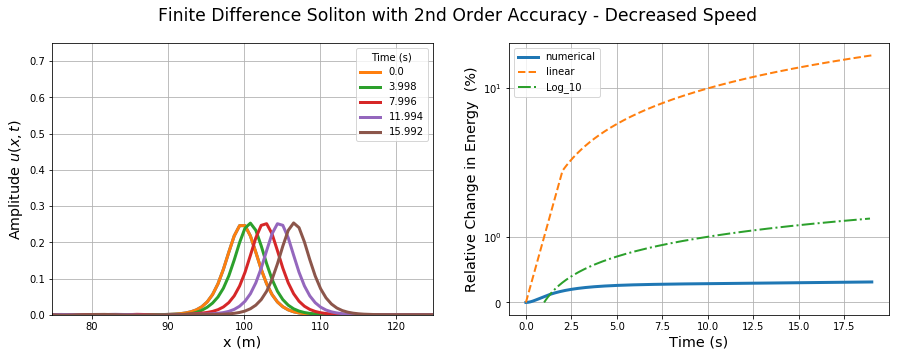

In [14]:
'''Plot Wave and Error in Energy for Reduced Speed'''
wave1_2order = Soliton(L=200.0, T=19.0, dx=0.71, dt=0.001, c=0.5)
title = 'Finite Difference Soliton with 2nd Order Accuracy - Decreased Speed'
plot_wave_energy(wave1_2order, title, 1999, linear=True, log=True)


The results are consistent with our expectations. In fact, decreasing the speed has removed the initial linear change in energy. This is promising, as it shows that the initial jump in error is not a feature of finite difference equations in general.

We will now modify the soliton implementation and use fourth order accuracy in the spatial derivative. Hopefully, this will lead to decreasing the initial change in energy, just as we saw with the slower speed.

#### 4th Order Accuracy

Equation [1] will be modified to incorporate the following finite difference derivatives.

$$  \frac{\partial u}{\partial x} \approx \frac{ \frac{1}{12} u(x_{-2}) - \frac{2}{3} u(x_{-1}) + \frac{2}{3} u(x_{+1}) - \frac{1}{12} u(x_{+2}) }{ \Delta x } \qquad \frac{\partial^3 u}{\partial x^3} \approx \frac{ \frac{1}{8}u(x_{-3}) - u(x_{-2}) + \frac{13}{8}u(x_{-1}) - \frac{13}{8}u(x_{+1}) + u(x_{+2}) - \frac{1}{8}u(x_{+3}) }{{\Delta x}^3} $$

$$ \frac{- {u_j^n} + {u_j^{n+1}}}{\Delta t} = -6{u_j^n} \frac{ \frac{1}{12}{u_{j-2}^n} - \frac{2}{3}{u_{j-1}^n} + \frac{2}{3}{u_{j+1}^n} - \frac{1}{12}{u_{j+2}^n} }{\Delta x} - \frac{ \frac{1}{8}{u_{j-3}^n} - {u_{j-2}^n} + \frac{13}{8}{u_{j-1}^n} - \frac{13}{8}{u_{j+1}^n} + {u_{j+2}^n} - \frac{1}{8}{u_{j+3}^n} }{ {\Delta x}^3 } $$

$$ {u_j^{n+1}} = {u_j^n} - 6{u_j^n} \Bigg[  \frac{1}{12}{u_{j-2}^n} - \frac{2}{3}{u_{j-1}^n} + \frac{2}{3}{u_{j+1}^n} - \frac{1}{12}{u_{j+2}^n} \Bigg] \frac{\Delta t}{\Delta x} - \Bigg[ \frac{1}{8}{u_{j-3}^n} - {u_{j-2}^n} + \frac{13}{8}{u_{j-1}^n} - \frac{13}{8}{u_{j+1}^n} + {u_{j+2}^n} - \frac{1}{8}{u_{j+3}^n} \Bigg] \frac{\Delta t}{{\Delta x}^3} $$

Since the only change to the Soliton class is with regards to these derivatives, the class will be extended and the kdv_stepper function will be modified. An additional argument will be added to the function, to allow the change in energy tolerance to be specified.

In [15]:
'''Extend Soliton Class'''
class Soliton_4Order(Soliton):
    '''
    Class extends Soliton and modifies the kdv_stepper function so that the spatial
    derivative is of 4th order accuracy. No new constructors are implemented
    '''
    def kdv_stepper(self, save_stride=99, save=False, EET=False, error=0.1):
        '''
        Function modifies kdv_stepper of parent class so that fourth order accuracy is
        used in the spatial derivative
        '''
        self.u = self.u0
        dtdx = self.dt/self.dx
        dtdx3 = self.dt/(self.dx)**3

        energy = np.zeros(len(self.t))
        # calculate energy using fourth order derivative in x
        energy[0] = np.sum(2*self.u**3 - \
            (((1.0/12)*np.roll(self.u, 2) - (2.0/3)*np.roll(self.u, 1) +\
            (2.0/3)*np.roll(self.u, -1) - (1.0/12)*np.roll(self.u, -2)) /(self.dx))**2)
        stack = [self.u]
        self.time = 'No EET set'

        for indx, tval in enumerate(self.t[1:]): # calc u and energy for t > t0
            # 1st and 3rd finite difference derivatives
            du_dx1c = (1.0/12)*np.roll(self.u, 2) - (2.0/3)*np.roll(self.u, 1) +\
            (2.0/3)*np.roll(self.u, -1) - (1.0/12)*np.roll(self.u, -2)
            du_dx3c = (1.0/8)*np.roll(self.u, 3) - np.roll(self.u, 2) +\
            (13.0/8)*np.roll(self.u, 1) - (13.0/8)*np.roll(self.u, -1) +\
            np.roll(self.u, -2) - (1.0/8)*np.roll(self.u, -3)

            self.u = self.u - 6*self.u*du_dx1c*dtdx - du_dx3c*dtdx3
            energy[indx+1] = np.sum(2*self.u**3 - (du_dx1c/self.dx)**2)

            if save == True and (indx%save_stride == 0): stack.append(self.u)
            if EET == True and (abs(energy[indx+1]-energy[0])/energy[0]) >= error:
                self.time = tval; break
        return self.u, stack, energy


Similar to the previous contour plot, a wide range of spacings is examined and the optimal region is magnified.

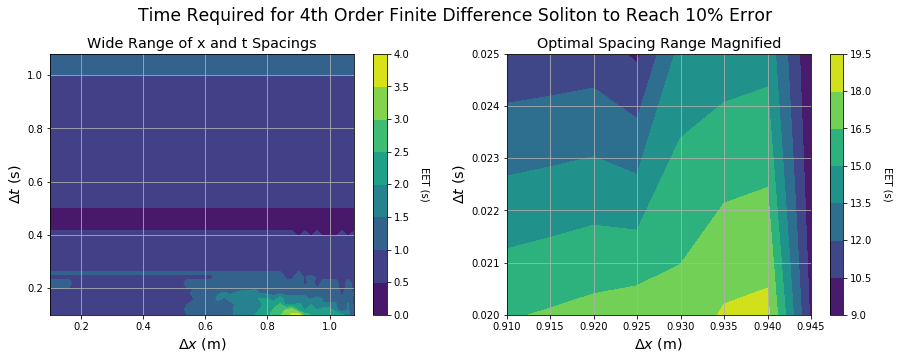

In [16]:
'''Plot EET Contour for 4th Order Spatial Accuracy Soliton'''
# wide-angle region is an uninformed guess- just to get an idea of EET values
wide_dxs = np.arange(0.1, 1.1, 0.02)
wide_dts = np.arange(0.1, 1.1, 0.02)

# zoomed view is result of first plot and a bit of trial and error
zoom_dxs = np.arange(0.91, 0.95, 0.005)
zoom_dts = np.arange(0.02, 0.03, 0.005)

title = 'Time Required for 4th Order Finite Difference Soliton to Reach 10% Error'
title_wide = 'Wide Range of x and t Spacings'
title_zoom = 'Optimal Spacing Range Magnified'
plot_EET(wide_dxs, wide_dts, zoom_dxs, zoom_dts, title, title_wide, title_zoom, order=4)


Perhaps somewhat surprisingly (or not), the sweet spot for the spatial spacing has been shifted to roughly $0.9355$ m. let's plot the waveform and change in energy to get an idea of how changing the derivatives effects the behavior of the soliton.

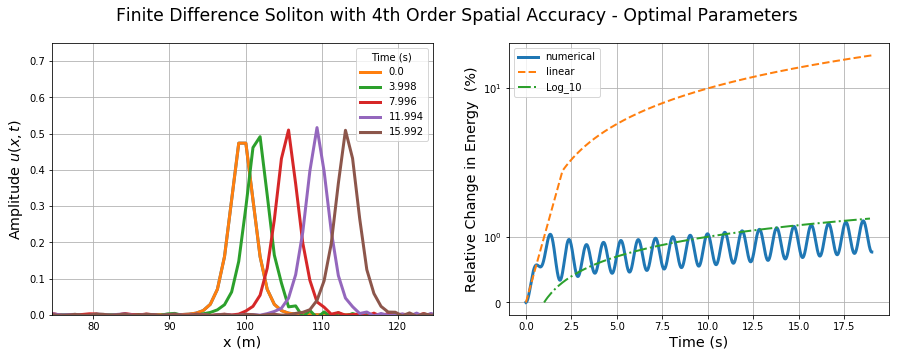

In [17]:
'''Plot Soliton Wave and Relative Error in Energy using Optimal Parameters'''
wave1_4order = Soliton_4Order(L=200.0, T=19.0, dx=0.935, dt=0.001, c=1.0)
title = 'Finite Difference Soliton with 4th Order Spatial Accuracy - Optimal Parameters'
plot_wave_energy(wave1_4order, title, 1999, linear=True, log=True)


These results are definitely unexpected. While, the average change in energy is lower than the case of the 2nd order accuracy, the fluctuations are much larger. We know that by changing the form of the derivative will lead to more accurate values, however the increased fluctuations just seems wrong. Something is missing from our analysis.

After a lot of trial and error, the issue seems to be cause by the previously mentioned drawback of the contour analysis, implemented as is. Because plotting smaller time steps requires significantly longer runtimes, we have restricted ourselves to  a contour plot with a minimum spacing of $\Delta t = 0.02$ s, yet we are decreasing that interval when implementing the soliton. What we have not considered is that the optimal spacing in x for this time step, will not be the optimal spacing for a smaller time step.

Further, if we attempt to decrease the time step, no EET will be set, as the wave conserves energy such that the change in energy does not exceed $10\%$.

To overcome this issue, we added the error tolerance argument to the Soliton_4Order class, so that we can investigate at a higher accuracy.

The following plots provide a second attempt at determining the optimal parameters for the fourth order spatial accuracy soliton.

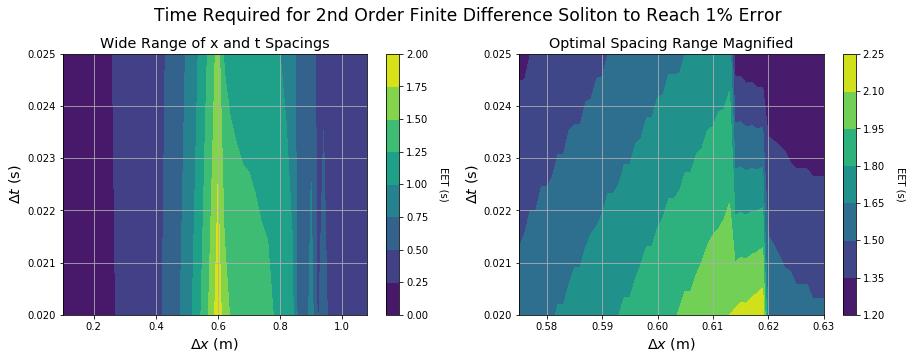

In [18]:
'''Plot EET Contour using lower tolerance for EET'''
# wide-angle region guess includes knowledge that small-time values are better
wide_dxs = np.arange(0.1, 1.1, 0.02)
wide_dts = np.arange(0.02, 0.03, 0.005)

# zoomed view is result of first plot and a bit of trial and error
zoom_dxs = np.arange(0.575, 0.63, 0.001)
zoom_dts = np.arange(0.02, 0.03, 0.005)

title = 'Time Required for 2nd Order Finite Difference Soliton to Reach 1% Error'
title_wide = 'Wide Range of x and t Spacings'
title_zoom = 'Optimal Spacing Range Magnified'
plot_EET(wide_dxs, wide_dts, zoom_dxs, zoom_dts, title, title_wide,\
         title_zoom, order=4, err_lim=0.01)


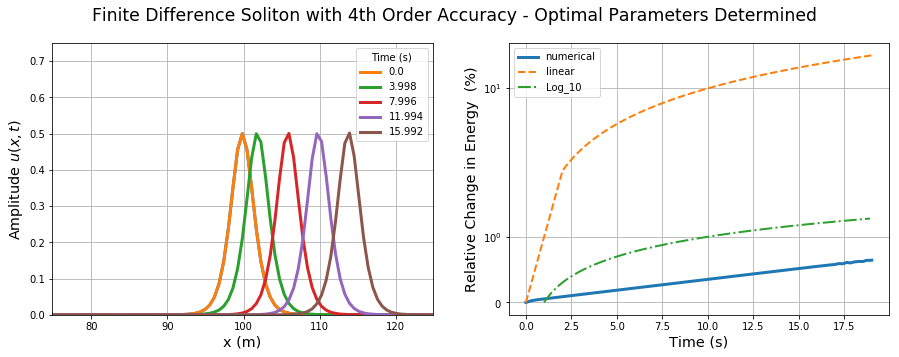

In [19]:
'''Plot Soliton Wave and Relative Error in Energy using Optimal Parameters'''
wave1_4order = Soliton_4Order(L=200.0, T=19.0, dx=0.6125, dt=0.001, c=1.0)
title = 'Finite Difference Soliton with 4th Order Accuracy - Optimal Parameters Determined '
plot_wave_energy(wave1_4order, title, 1999, linear=True, log=True)


Restricting our contour plot to $1\%$ change in error proved successful in determining the optimal parameters for the solution, as we can see that the initial linear increase in energy change has been removed. It is easy to see the both the waveform and conservation of energy has been drastically improved when compared to the first attempt which used the 2nd order accuracy.

### Final Remarks

There certainly are a number of factors involved to optimally instantiate a soliton wave which exhibits conservation of energy. To start, we compared the initial energy value of the wave by direct numerical integration to that of the finite difference sum. We found that they were consistent to within four decimal places (using 2nd order spatial accuracy).

Through use of contour plots, we were able to identify several factors that impacted the stability of the soliton as it propagated through time. The first was that, unlike the wave equation, there is a sweet spot for the spacing in the spatial domain. Usually, we think that in general increasing the resolution will lead to more accurate results, but this is not always the case with finite difference equations.

Saying that, it appears to be the case with the spacing of time values. The smaller the spacing, the more accurate the result. This comes with the cost of increasing the runtime at a higher than linear rate. Further, investigating the optimal range of spacings using the contour plots is complicated by the fact the low time steps make the runtime blow up.

When we investigated the soliton using the fourth order difference equations, we were faced with a new complication. It requires an impractical amount of runtime to analyze a large range of spacings when the time steps are small, however this is exactly where we want to look. We found that the sweet spot in $\Delta x$ for a range of time steps was not the same for a different range of time steps. Thus, we could not simply decrease $\Delta t$ and obtain satisfactory results. This can be thought of as expecting a "ridge" in the contour plot, when in fact the local maxima turned out to be a peak.

This last point of consideration could prove to be the biggest hurdle, if super high accuracy was required, or a different problem with a larger dataset was studied. In these cases, the runtimes would be even larger, so the process of trial and error which I used, may in fact become impractical as well. This highlights the fact that knowing what you are looking for is not the only required piece of information- you also need to know HOW to look for it.

It should be noted that we only investigated the improvements offered by using fourth order accuracy over second order, in the spatial domain. There are several ways to improve the model by modifying the time derivative. We could use higher order accuracy in the forward difference equation. When it comes to central differences; we saw that the wave equation was able to use a bit of a work-around to use the central finite difference equation in the temporal domain. Higher order central finite differences, would require previous time steps that we don't appear to have. However, there are possibly similar work-arounds (as employed in by the wave equation) to get these unknowns, or perhaps the analytic solution could be used to do the initial set-up. It is expected that a more accurate initial setup would lead more accurate results, so this may be the best option.

As a more advanced improvement to the model, we would consider using different finite different schemes, such as the forward-Euler scheme, the backward-Euler scheme, or the leap-frog scheme. These will be left for PHYS 581.

Thanks for a great course!

### References

[1] P.G. Drazin & R.S. Johnson $\textit{Solitons: an Introduction}$. 1989. Cambridge University Press. New York. 